In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scanpy.external as sce
import sys

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=60, facecolor='white')
sns.set_style("ticks")


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.1 louvain==0.7.1 pynndescent==0.5.8


In [ ]:
adata4_3=sc.read_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d4_3__subset.h5ad')

In [ ]:
adata5_3=sc.read_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d5_3__subset.h5ad')

In [ ]:
adata6=sc.read_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d6_subset.h5ad')

In [ ]:
adata7=sc.read_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d7_subset.h5ad')

In [ ]:
adata8=sc.read_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/d8_subset.h5ad')

In [ ]:
adata=adata8.concatenate(adata4_3,adata5_3,adata6,adata7,  index_unique=None, join='outer' )

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the ne

In [ ]:
adata

AnnData object with n_obs × n_vars = 147774 × 24862
    obs: 'week_stage', 'day', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'batch'
    var: 'gene_ids-0', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'gene_ids-2', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-2', 'n_cells-2', 'mt-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'gene_ids-3', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-3', 'feature_types-1-0-0-0-0-0

In [ ]:
adata.var=adata.var.drop(columns = [

'gene_ids-0', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0-0-0', 'feature_types-1-0-0-0-0-0-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'gene_ids-1', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-0-0-1', 'feature_types-1-0-0-0-0-0-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'gene_ids-2', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-0-0-2', 'feature_types-1-0-0-0-0-0-2', 'n_cells-2', 'mt-2', 'n_cells_by_counts-2', 'mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'gene_ids-3', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-3', 'feature_types-1-0-0-0-0-0-0-0-3', 'feature_types-1-0-0-0-0-0-3', 'n_cells-3', 'mt-3', 'n_cells_by_counts-3', 'mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'gene_ids-4', 'feature_types-1-0-0-0-0-0-0-0-0-0-0-0-4', 'feature_types-1-0-0-0-0-0-0-0-4', 'feature_types-1-0-0-0-0-0-4', 'n_cells-4', 'mt-4', 'n_cells_by_counts-4', 'mean_counts-4', 'pct_dropout_by_counts-4', 'total_counts-4'
])

/tmp/ipykernel_4966/2892397836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], hist_kws={"alpha":1})
/tmp/ipykernel_4966/2892397836.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0], hist

Text(0.5, 1.0, 'Percentage of mitochondrial gene')

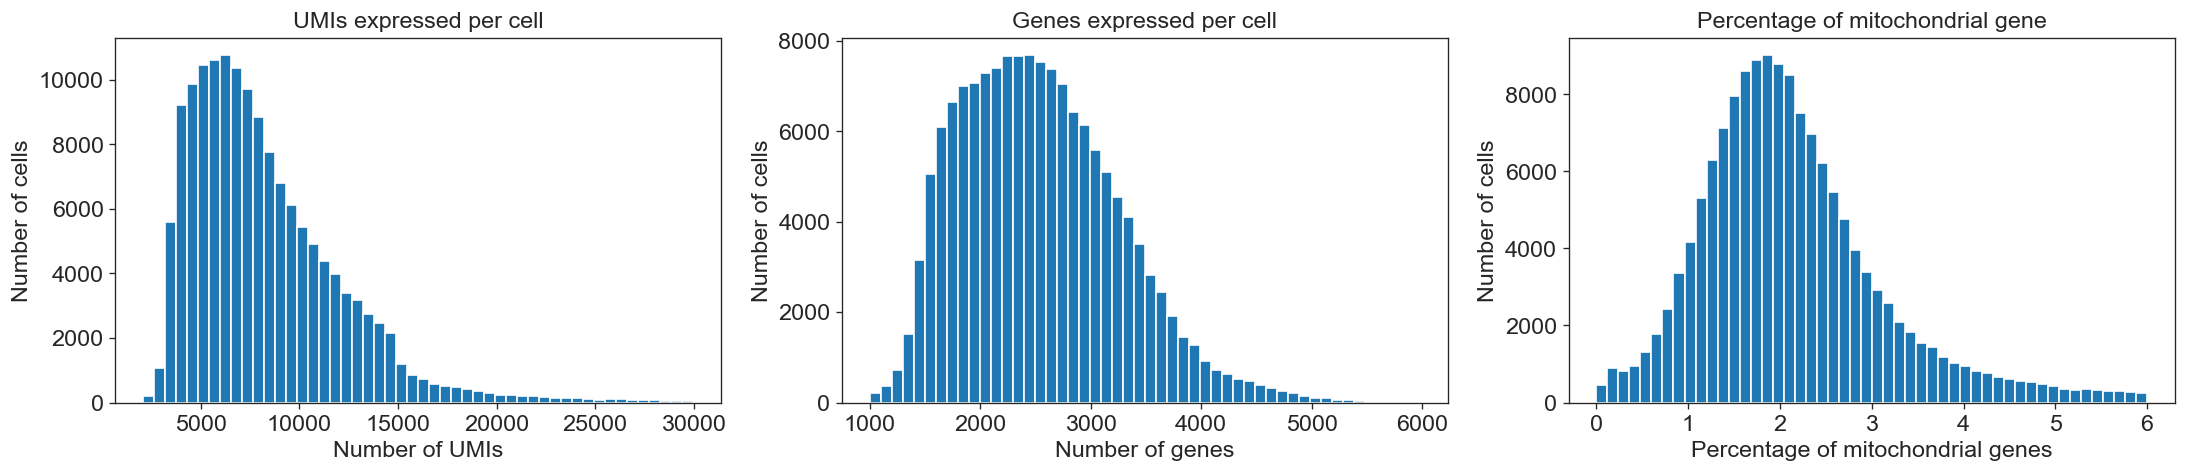

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(22, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение числа генов по клеткам
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1], hist_kws={"alpha":1})
axs[1].set_xlabel("Number of genes")
axs[1].set_ylabel("Number of cells")
axs[1].set_title("Genes expressed per cell")

# Отрисовываем распределение общего числа UMI
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0], hist_kws={"alpha":1})
axs[0].set_xlabel("Number of UMIs")
axs[0].set_ylabel("Number of cells")
axs[0].set_title("UMIs expressed per cell")

#min_umi = 10000
#axs[0].plot([min_umi, min_umi], [0, 12000], color="red")
#axs[0].grid(alpha=0.5)
#axs[0].set_ylim(0, 12000)

#max_umi = 47000
#axs[0].plot([max_umi, max_umi], [0, 45000], color="red")
#axs[0].grid(alpha=0.5)
#axs[0].set_ylim(0, 41000)

# Отрисовываем распределение митохондриальной экспрессии
sns.distplot(adata.obs["pct_counts_mt"], kde=False, ax=axs[2], hist_kws={"alpha":1})
axs[2].set_xlabel("Percentage of mitochondrial genes")
axs[2].set_ylabel("Number of cells")
axs[2].set_title("Percentage of mitochondrial gene")
#plt.savefig('figures/D0_D4_D6_after_filtration.svg')
#max_umi = 15
#axs[2].plot([max_umi, max_umi], [0, 9000], color="red")
#axs[2].grid(alpha=0.5)
#axs[2].set_ylim(0, 9000)

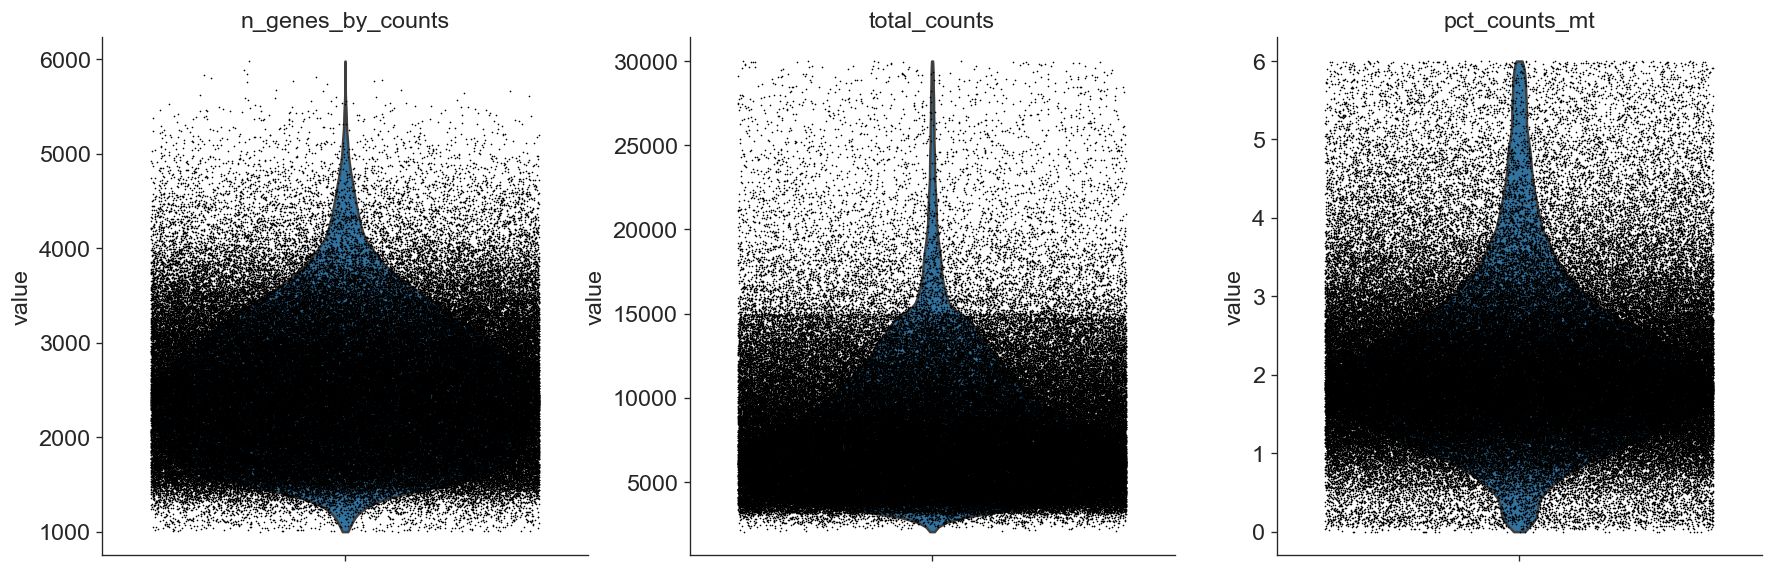

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
adata = adata[adata.obs.total_counts < 25000, :]


In [ ]:
adata.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/qc4_1_5_1_.h5ad')

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:01)


In [ ]:
cell_cycles = pd.read_csv('/home/julia/data/cell_cycle_genes/all_human_genes.csv')
all_genes = [x for x in adata.var_names]
for gene in cell_cycles.all_genes:
    if gene in all_genes:
        all_genes.remove(gene)
adata = adata[:, all_genes].copy()

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.pp.scale(adata)

extracting highly variable genes
    finished (0:00:32)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [ ]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:29)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:03:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:25)
running Leiden clustering
    finished: found 39 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:09)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


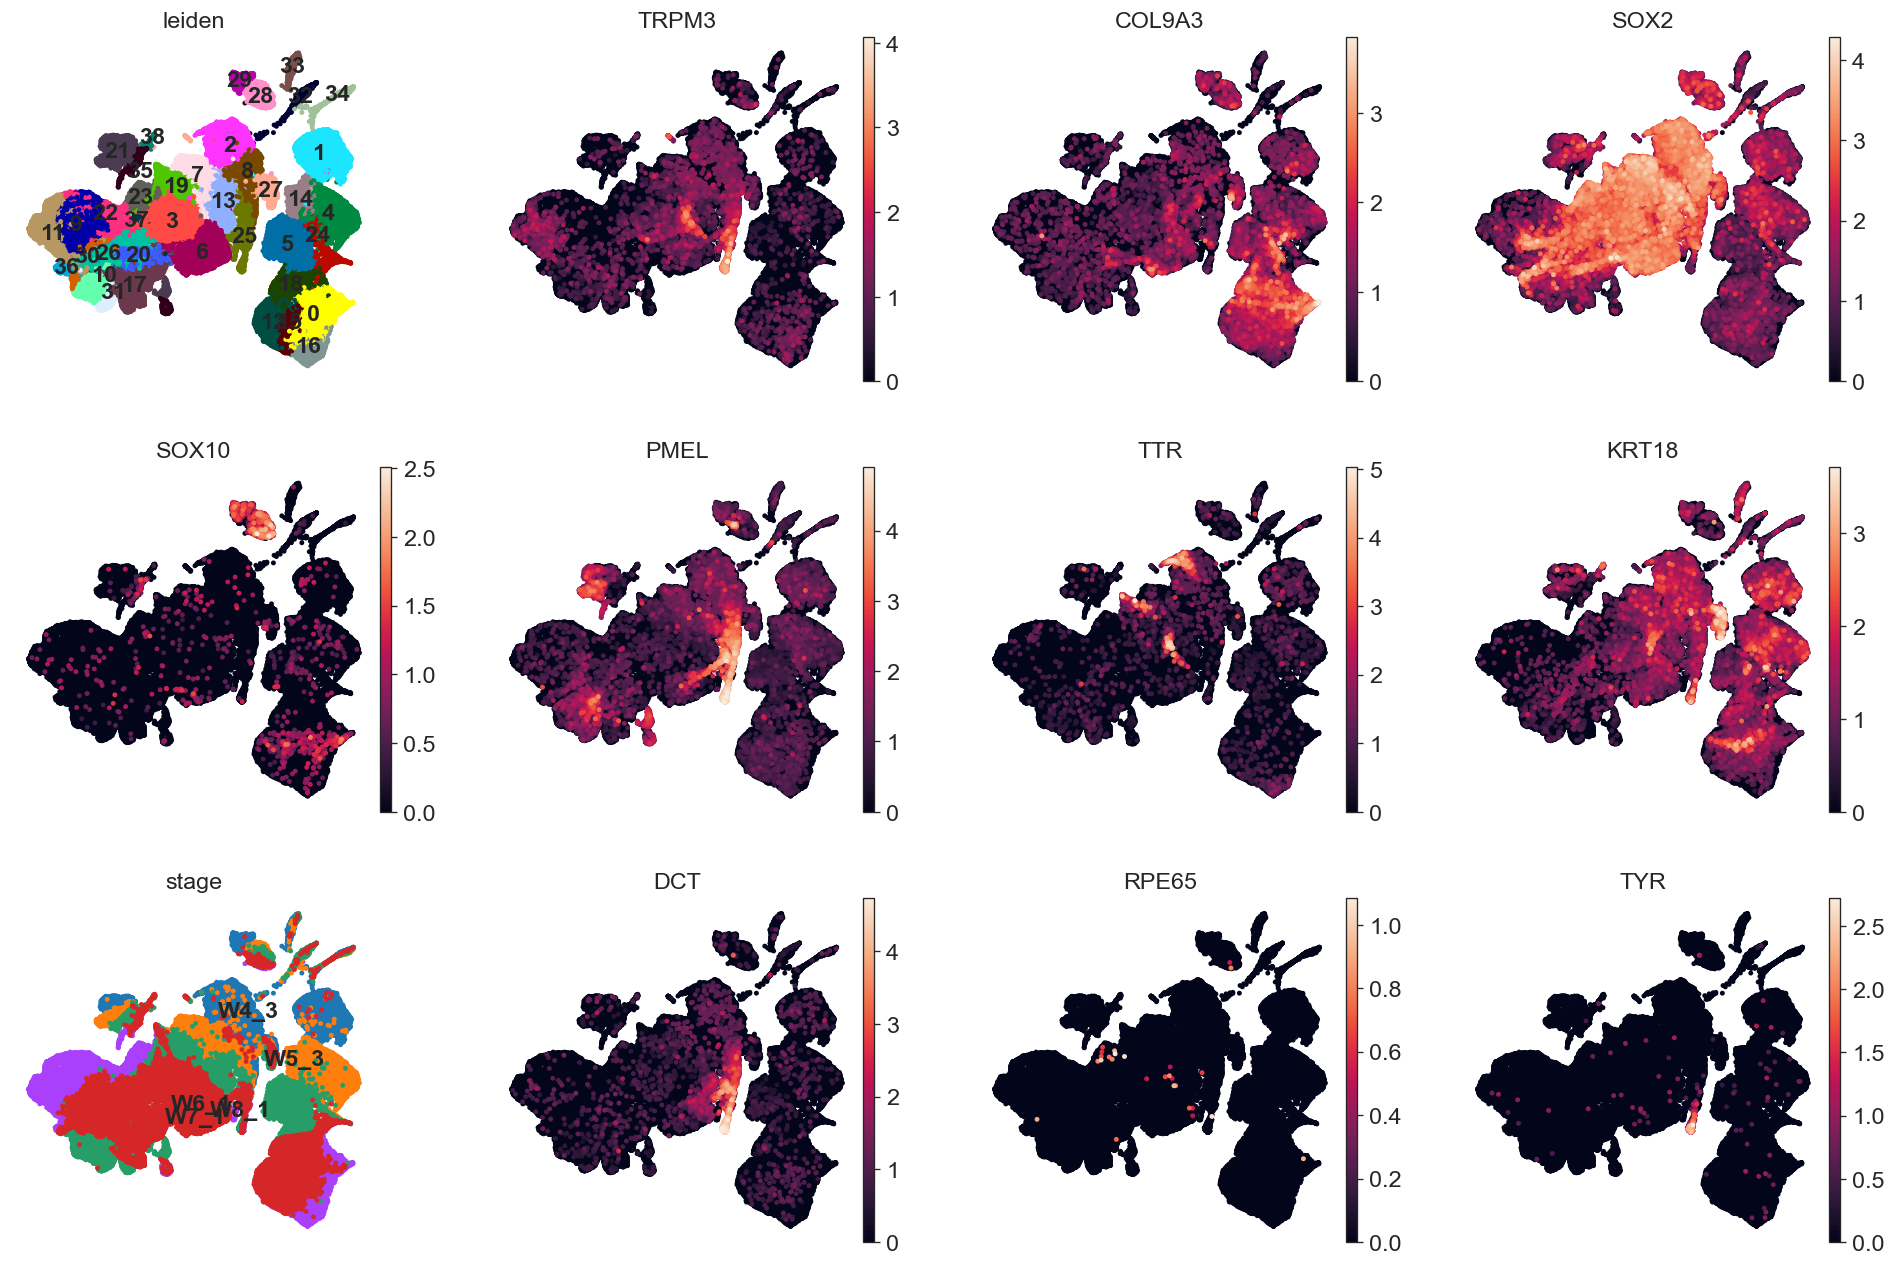

In [ ]:
sc.pl.umap(adata, color=['leiden', "TRPM3",  "COL9A3", "SOX2", "SOX10", "PMEL", "TTR", "KRT18", 'stage', 'DCT', 'RPE65', 'TYR' ], size=35, frameon=False,  legend_loc='on data')

In [ ]:
adata.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/umap_4_1_5_1_678no_cell_cycle.h5ad')

In [ ]:
adata=adata.raw.to_adata()

In [ ]:
adata_new=adata[~adata.obs['leiden'].isin(['25', '27', '8','6','7', '2', '3', '38', '7', '19', '23', '31', '33', '34', '38', '21'])]

In [ ]:
adata_new

View of AnnData object with n_obs × n_vars = 95557 × 24768
    obs: 'week_stage', 'day', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'stage_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
sc.pp.highly_variable_genes(adata_new, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata_new.raw = adata_new

extracting highly variable genes
    finished (0:00:07)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [ ]:
adata_new = adata_new[:, adata_new.var.highly_variable]
sc.pp.scale(adata_new, max_value=10)
sc.tl.pca(adata_new, svd_solver='arpack', n_comps =100)

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:26)


In [ ]:
sc.pp.neighbors(adata_new, n_neighbors=80, n_pcs=100)
sc.tl.umap(adata_new)

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:33)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:03:39)


In [ ]:
sc.tl.leiden(adata_new, resolution=0.5)

running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:20)


/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


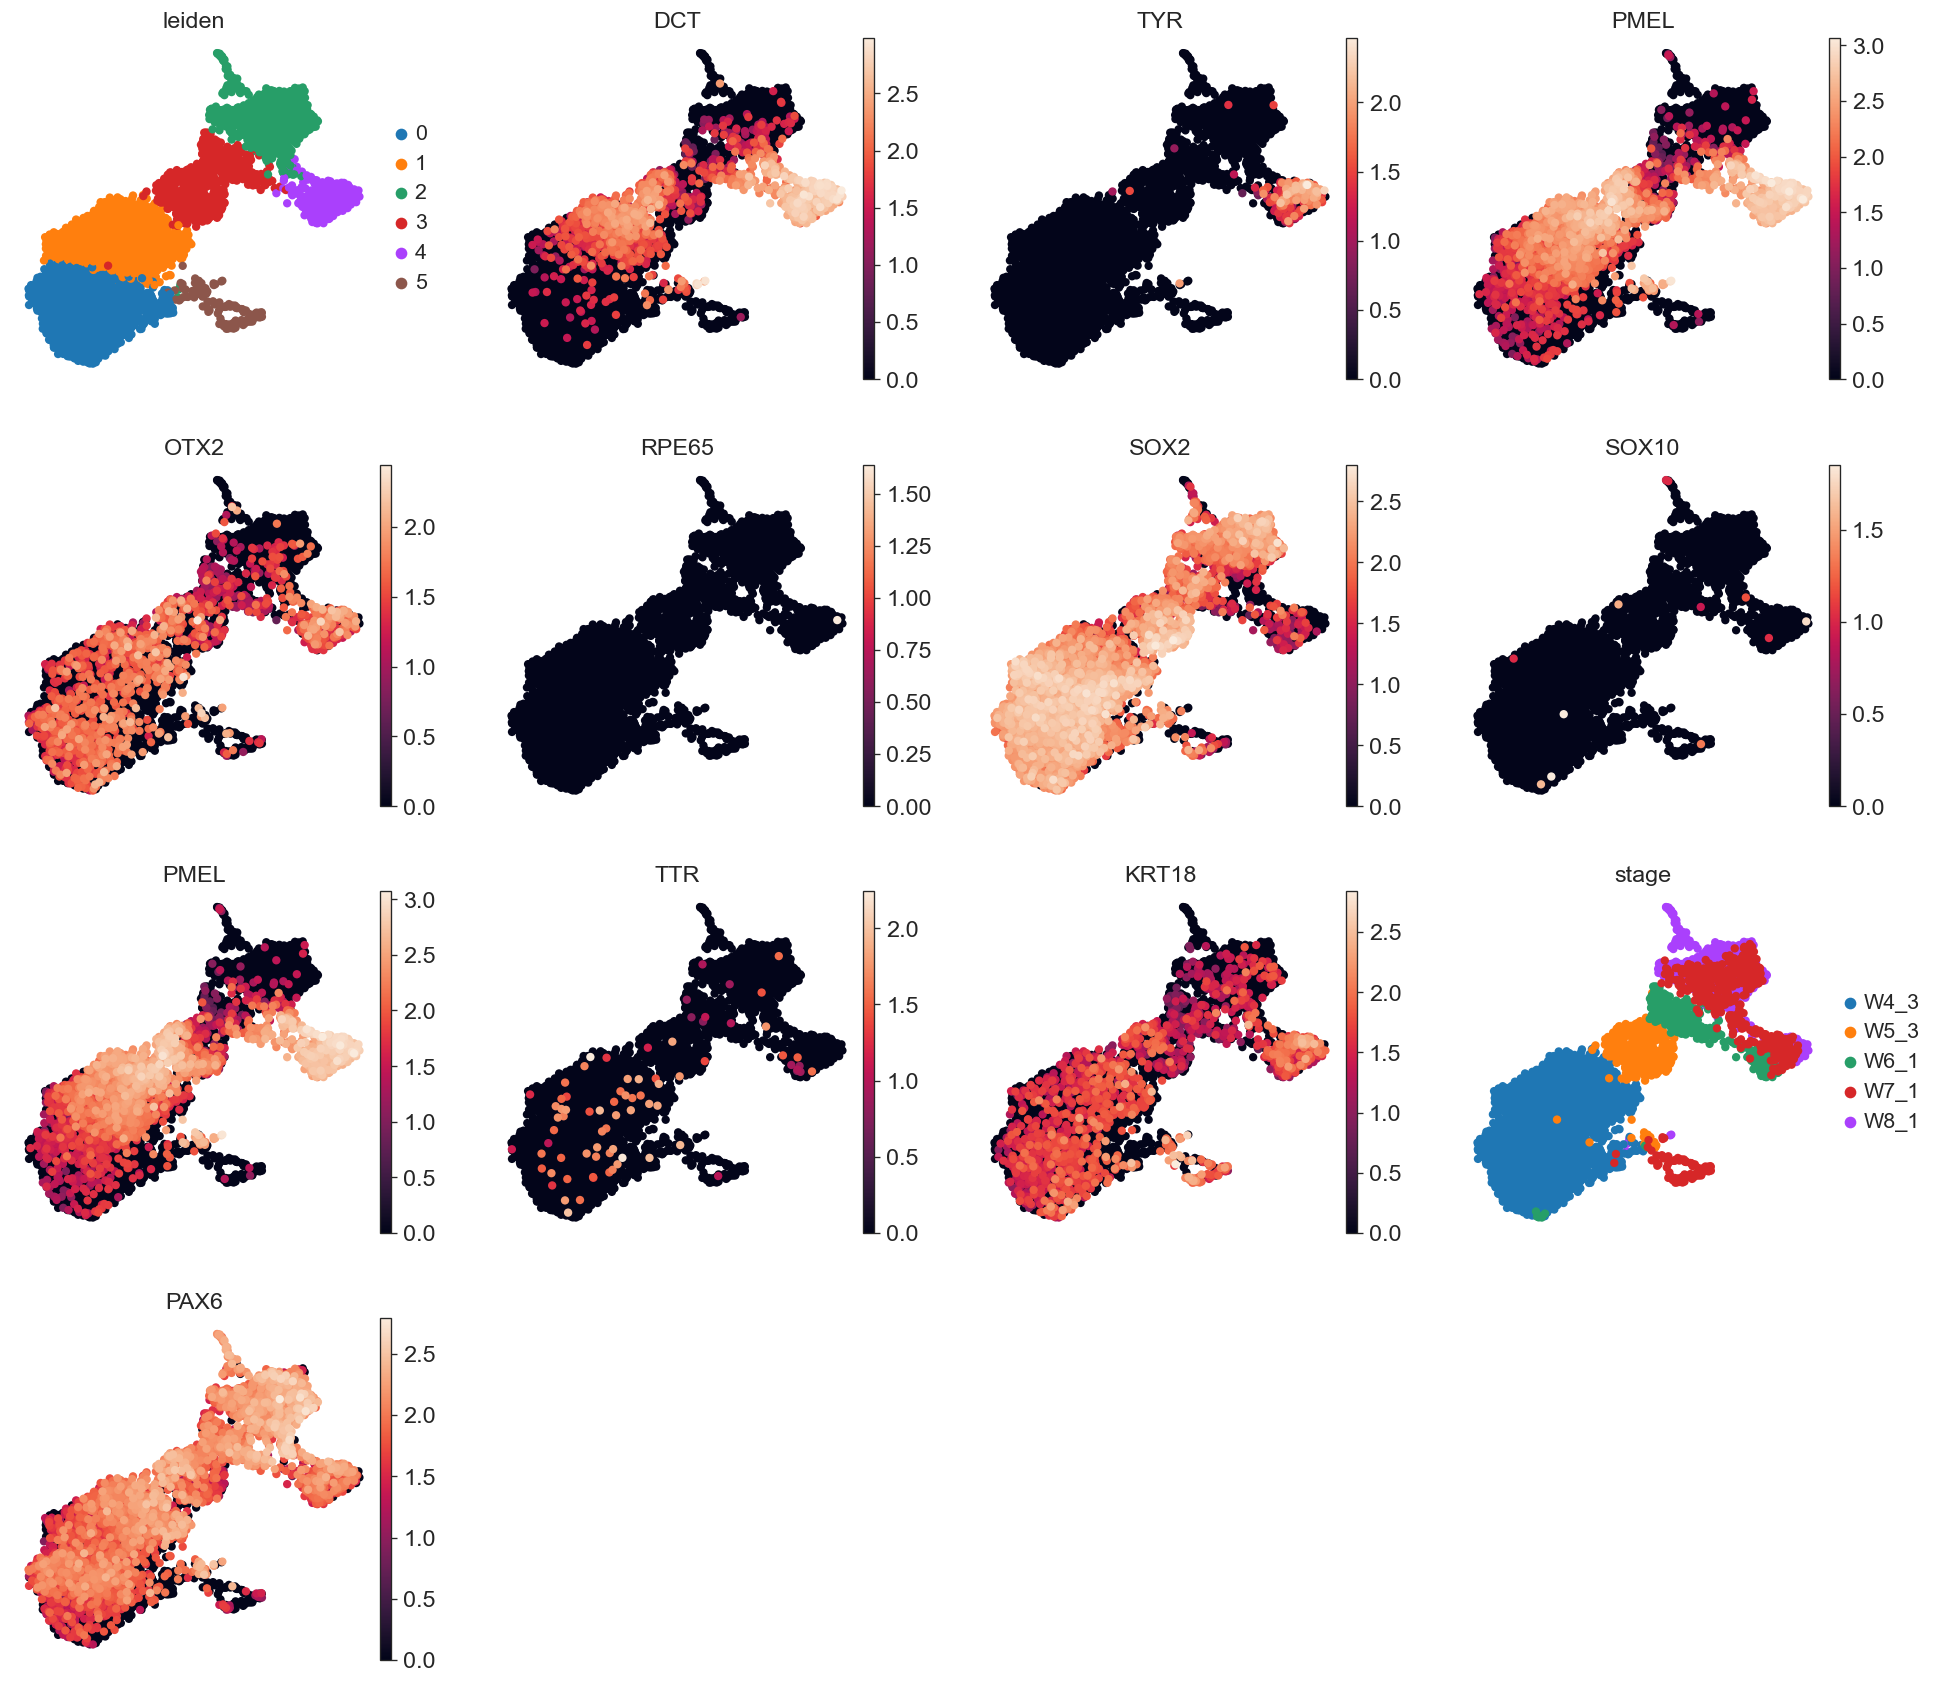

In [ ]:
sc.pl.umap(adata_new, color=['leiden', "DCT", 'TYR', 'PMEL', 'OTX2', "RPE65", "SOX2", "SOX10", "PMEL", "TTR", "KRT18", 'stage','PAX6'], size=100, frameon=False)

In [ ]:
adata_new

AnnData object with n_obs × n_vars = 95557 × 1895
    obs: 'week_stage', 'day', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'batch', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'stage_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_new=adata_new.raw.to_adata()

In [ ]:
adata_new.write_h5ad('/home/julia/GSE155121_human/h5ad/umap_4_1_5_1_ready.h5ad')

In [ ]:
adata_new.write_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/umap_4_1_5_1_ready.h5ad')

In [ ]:
adata=sc.read_h5ad('/home/julia/GSE155121_human/separate_analysis/h5ad/umap_4_1_5_1_ready.h5ad')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


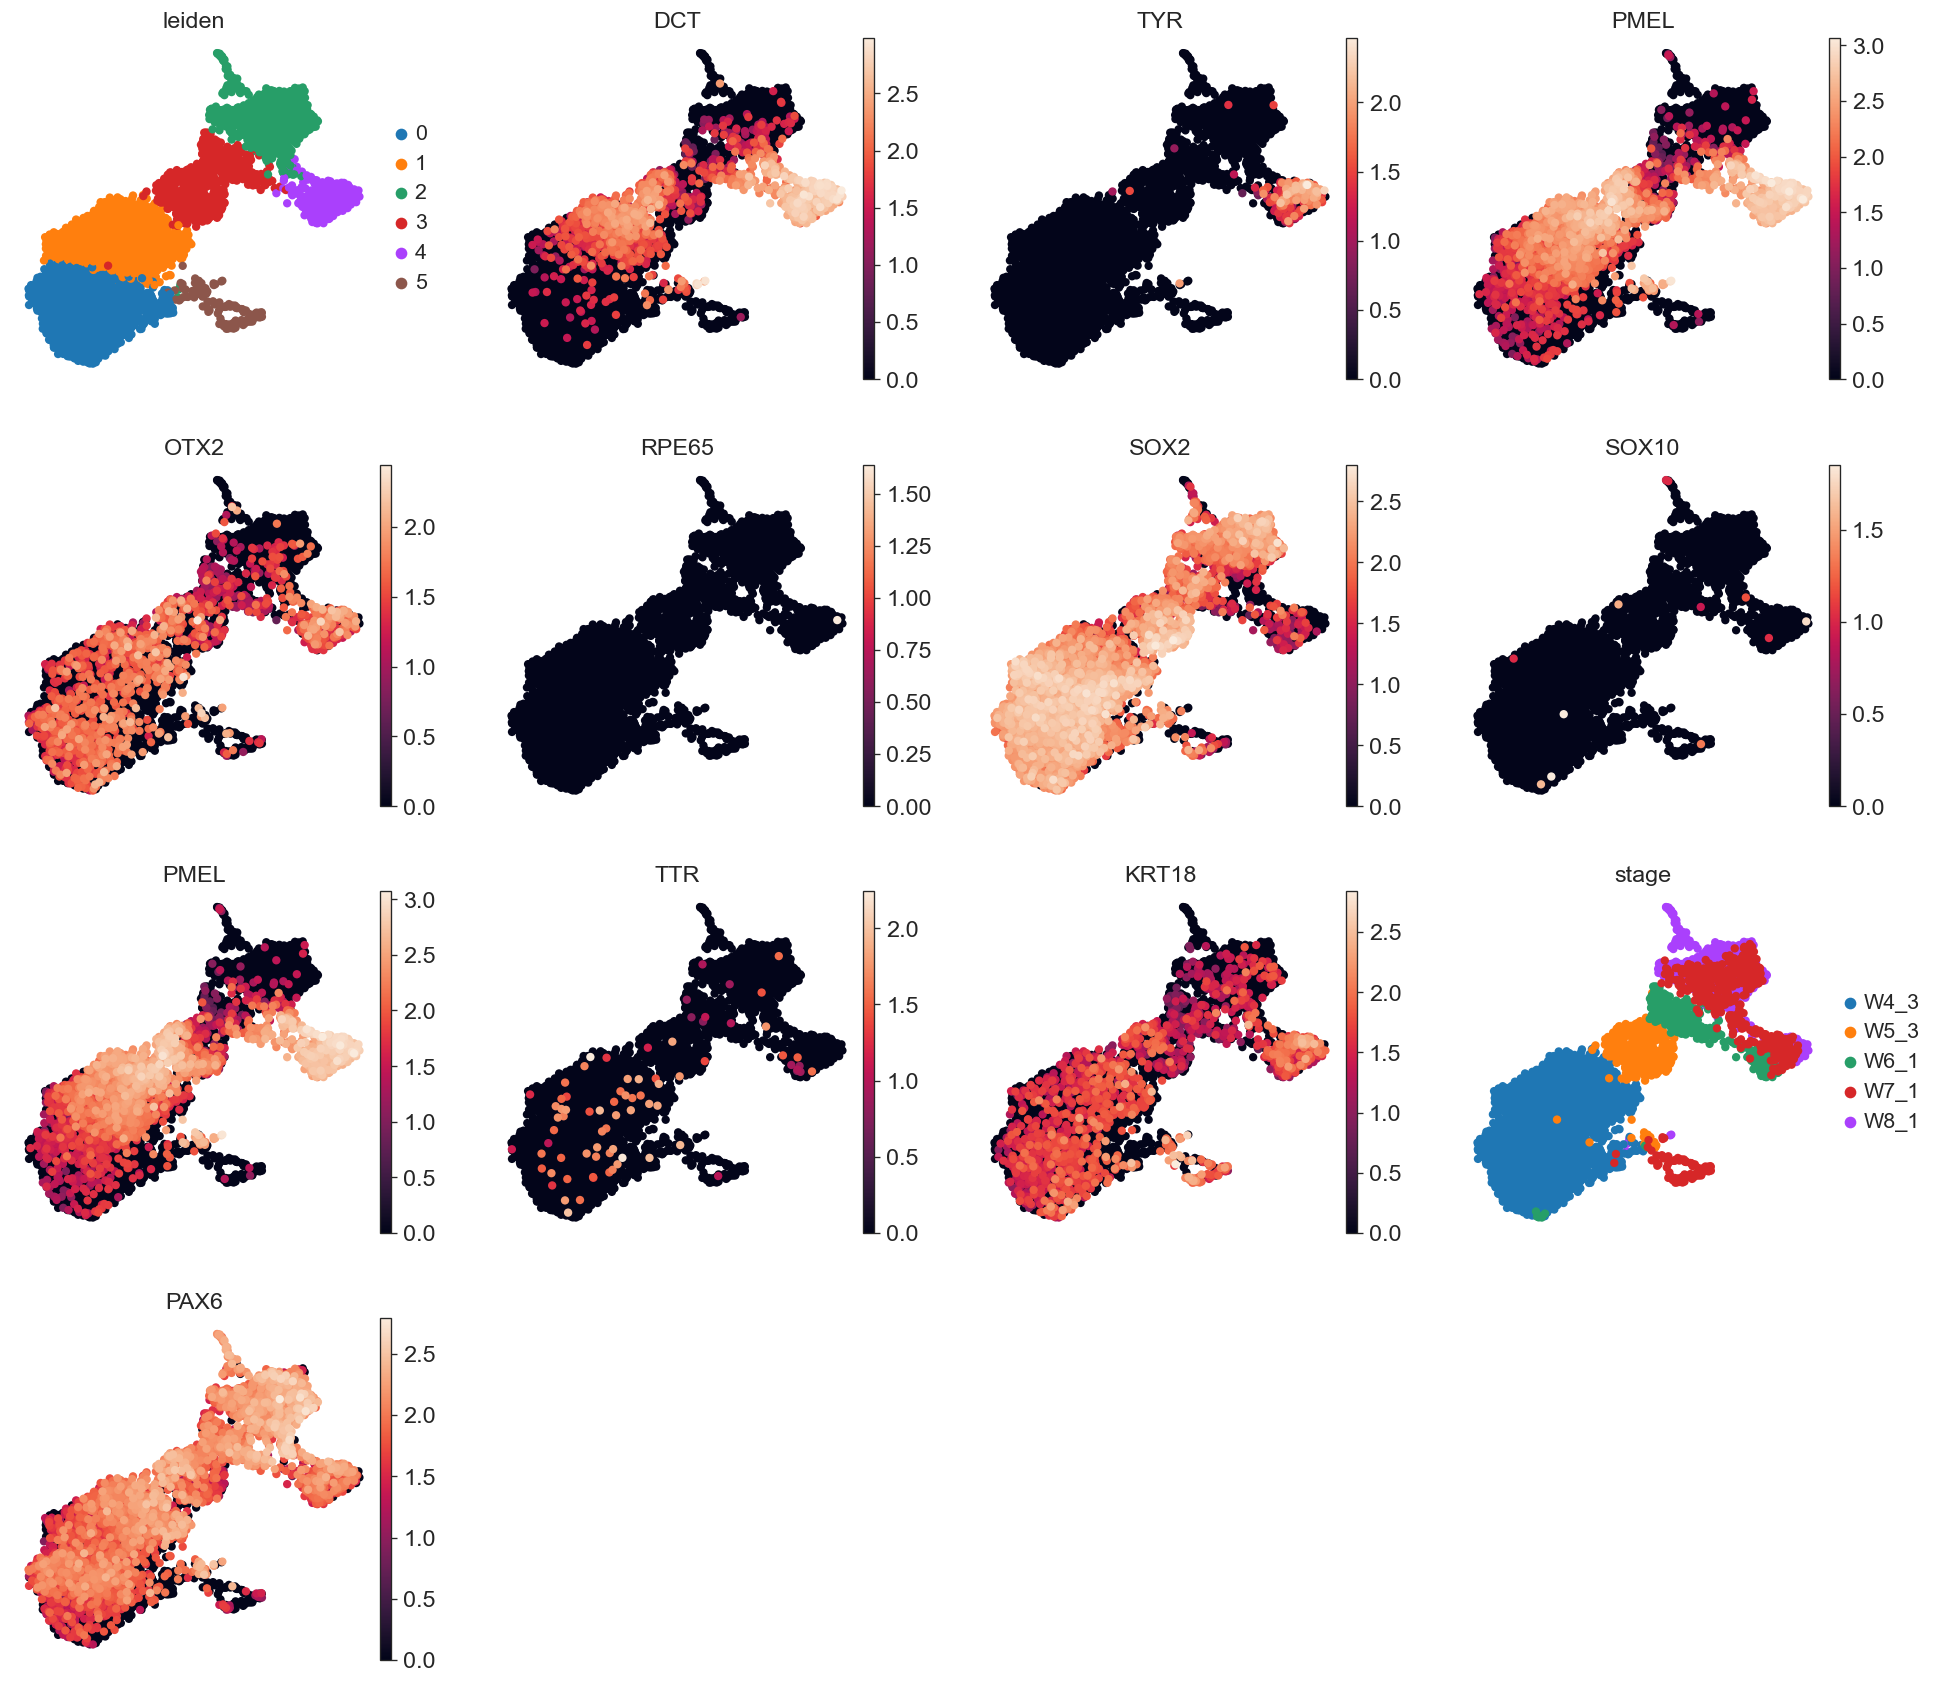

In [ ]:
#sc.settings.set_figure_params(dpi=170, facecolor='white')
sc.pl.umap(adata, color=['leiden', "DCT", 'TYR', 'PMEL', 'OTX2', "RPE65", "SOX2", "SOX10", "PMEL", "TTR", "KRT18", 'stage','PAX6'
                         #"ERMN", "OTX2", "SLC1A1",
#"INPP5K", "SLC6A13", "STRA6", "SLC6A20A", "LRAT", "RBP1", "SLC4A5", "ACSL6", "PLTP", "CST3", "TRF", "ARL6IP1",
#"MT3", "RDH10", "TIMP3"
                        ], size=100, frameon=False, )

In [ ]:
mel_rpe=["GJB6", "MLPH",  "SLC4A5","SYT4",  "CITED1","FMN1", "GJB2","MYO5A",   "EDNRB",   "S100B",  "MGLL",
 "SCN8A", "TECPR1", "CDK2", 'MLANA',"LBH", "CYB5A",  "SYNGR1", "CCK", "SPP1", "STMN3", "DKK3", "FABP3", "ATP1A1",  "GSTA4",  "SLC24A5",
 "TYR", "SLC45A2", "RAB38","NEAT1", "PMEL","TYRP1",  "GPNMB", "TRPM1","DCT", "GSTP1", "PON1","MT3","SLC24A1","ACSL6",
 "SLC1A1","RD3L", "COL4A4","LRAT",
 "TMEM56",  "ERMN","RPE65", "SLC6A13", "RGR",   "TTR", "RDH5", "ITGB8",
 "SLC16A8",  "CSPG5", "INPP5K","RLBP1", "COL9A3", "ENPP2", "RDH10", "ABHD2","EZR",  "ATP1B1","BASP1", "CLU","OTX2",
"KRT18", "STRA6",   "TRPM3",  "CST3", "TMEM98", "SLC2A1","BSG","RBP1", "ARL6IP1"]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


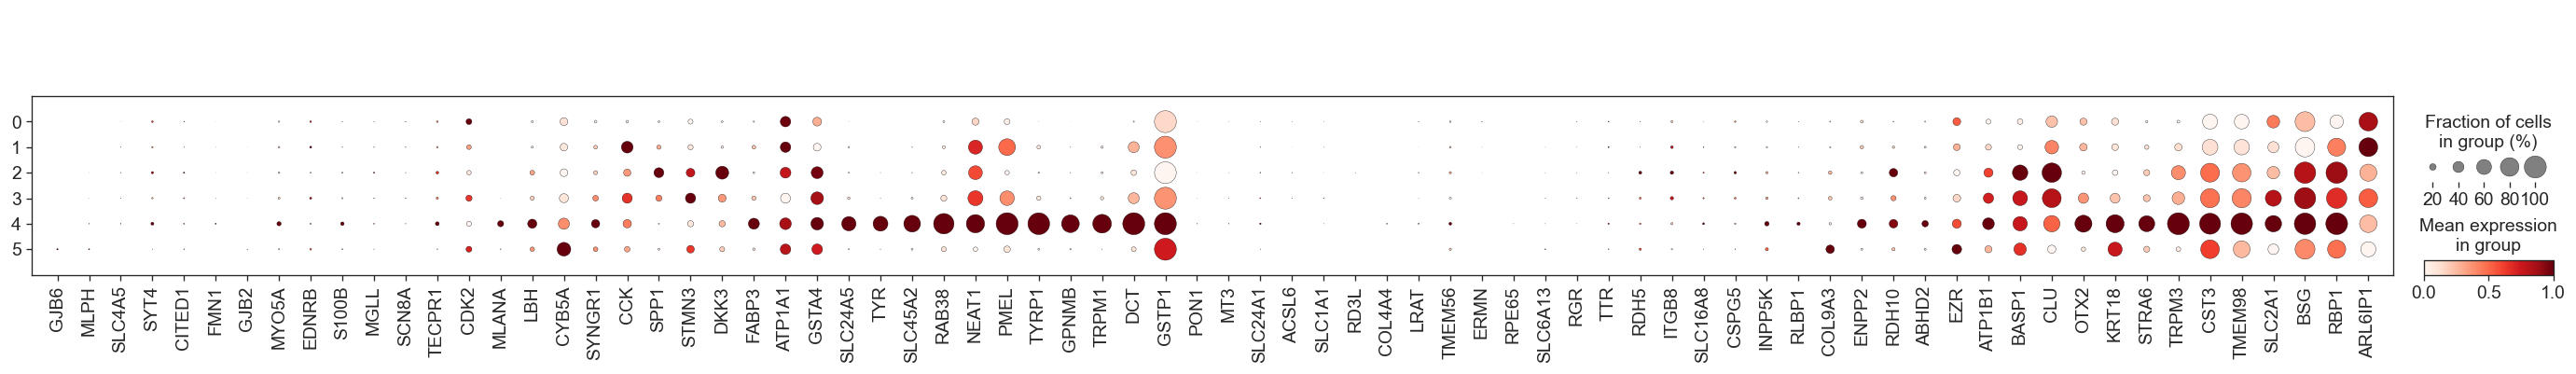

In [ ]:
sc.pl.dotplot(adata, mel_rpe, groupby='leiden', use_raw=False, show=True, standard_scale='var',
           save='4_8_leiden_1.svg'
             )

In [ ]:
mel_rpe1=["GJB6", "MLPH",  "SLC4A5","SYT4",  "CITED1","FMN1", "GJB2", "MYO5A",   "EDNRB",   "S100B",  "MGLL",
"SCN8A", "TECPR1","CDK2", 'MLANA',"LBH", "CYB5A",  "SYNGR1", "SPP1", "STMN3",  "CCK","DKK3", "FABP3", "ATP1A1",  "SLC24A5",
"TYR","SLC45A2", "RAB38", "PMEL","TYRP1",  "GPNMB", "TRPM1",  "GSTA4",   "DCT", "NEAT1", "GSTP1",
"PON1","MT3","SLC24A1","ACSL6", "SLC1A1","RD3L", "COL4A4","LRAT", "TMEM56",  "ERMN","RPE65", "SLC6A13",
"RGR","TTR", "RDH5", "ITGB8","SLC16A8",  "CSPG5", "INPP5K", "RLBP1",  "ENPP2", "ABHD2","COL9A3", "EZR",  "ARL6IP1",
"OTX2","KRT18", "STRA6","RDH10", "ATP1B1","TRPM3",  "SLC2A1", "BASP1",     "CST3", "BSG", "TMEM98", "CLU","RBP1" ]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


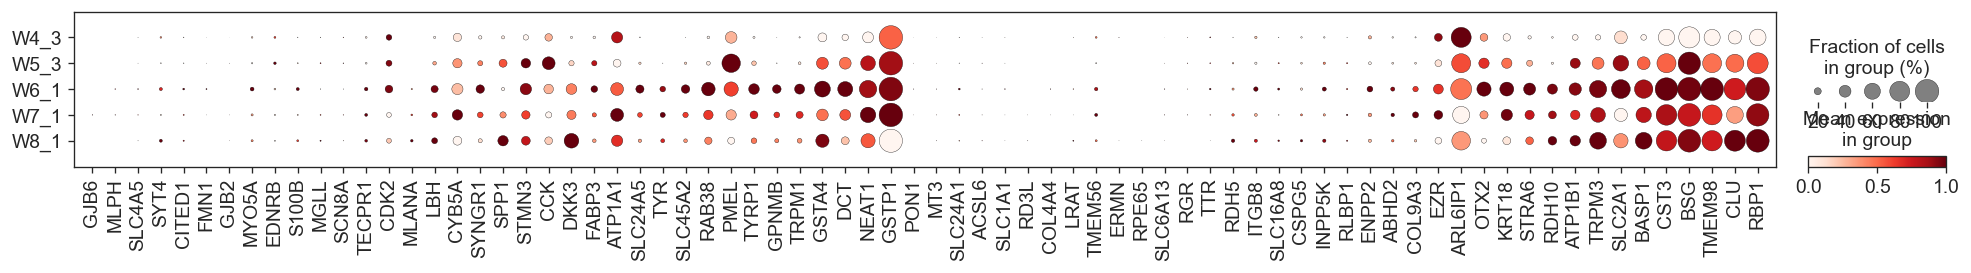

In [ ]:
sc.pl.dotplot(adata, mel_rpe1, groupby='stage', use_raw=False, show=True, standard_scale='var',figsize=(20, 1.7),

              save='4_8_weeks.svg'
             )

In [ ]:

KeyError: "Could not find keys '['CAR14', 'GM26917', 'TRF']' in columns of `adata.obs` or in adata.var_names."

### RPE genes

In [ ]:
genes_RPE=["TTR", "PTGDS", "DCT",  "RGR", "RPE65", "RDH5", "MALAT1",  "GPNMB", "MGLL", "TRPM3", "KCNJ13", "ARL6IP1", "CHCHD10", "ENPP2", "SLC16A8",
         "SLC24A5", "TYR", "KRT18",  "SYT4", "MLANA", "LRAT", "EDNRB", "RLBP1", "CITED1", "PMEL", "MT3", "GSTP1"]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


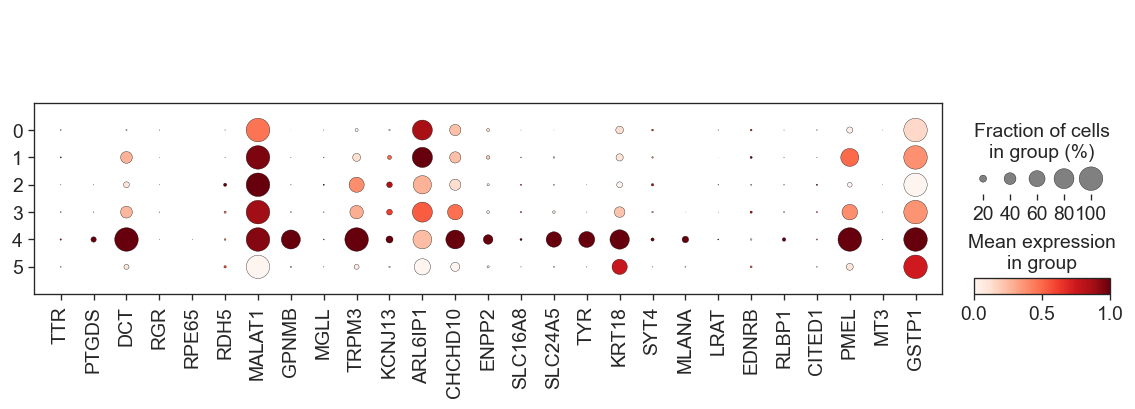

In [ ]:
sc.pl.dotplot(adata, genes_RPE, groupby='leiden', use_raw=False, show=True, standard_scale='var')

In [ ]:
RPE_TFs=["BNC2", "TFCP2", "ZBTB37", "MTF1", "AEBP2",  "GTPBP6", "ZSCAN21", "KDM4A", "HMBOX1", "RCOR1", "USP39",
         "RBM22", "CREBL2", "OTUD4", "NUAK2", "SP4", "HIVEP3", "TERF2", "PIR", "RXRA", "CPEB1", "TRIM24", "XRCC4", "DMAP1",
         "ZFP62", "RORC",  "PARP1", "NELFA", "ZCCHC14", "GZF1", "PIK3C3",  "LCOR",
         "KDM4C", "RBPJ"]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


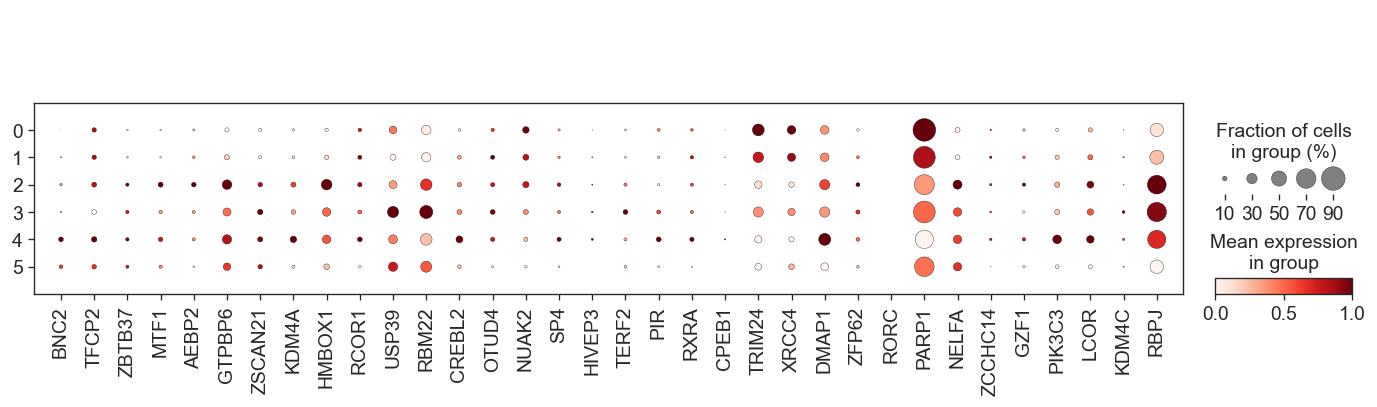

In [ ]:
sc.pl.dotplot(adata, RPE_TFs, groupby='leiden', use_raw=False, show=True, standard_scale='var')

In [ ]:
def Intersection(RPE_TFs, genes_RPE):
    return set(RPE_TFs).intersection(genes_RPE)

In [ ]:
print(Intersection(RPE_TFs, genes_RPE))

set()


In [ ]:
RPE_all=["TTR", "PTGDS", "DCT",  "RGR", "RPE65", "RDH5", "MALAT1",  "GPNMB", "MGLL", "TRPM3", "KCNJ13", "ARL6IP1", "CHCHD10", "ENPP2", "SLC16A8",
         "SLC24A5", "TYR", "KRT18",  "SYT4", "MLANA", "LRAT", "EDNRB", "RLBP1", "CITED1", "PMEL", "MT3", "GSTP1",
         "BNC2", "TFCP2", "ZBTB37", "MTF1", "AEBP2",  "GTPBP6", "ZSCAN21", "KDM4A", "HMBOX1", "RCOR1", "USP39",
         "RBM22", "CREBL2", "OTUD4", "NUAK2", "SP4", "HIVEP3", "TERF2", "PIR", "RXRA", "CPEB1", "TRIM24", "XRCC4", "DMAP1",
         "ZFP62", "RORC",  "PARP1", "NELFA", "ZCCHC14", "GZF1", "PIK3C3",  "LCOR",
         "KDM4C", "RBPJ" ]

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


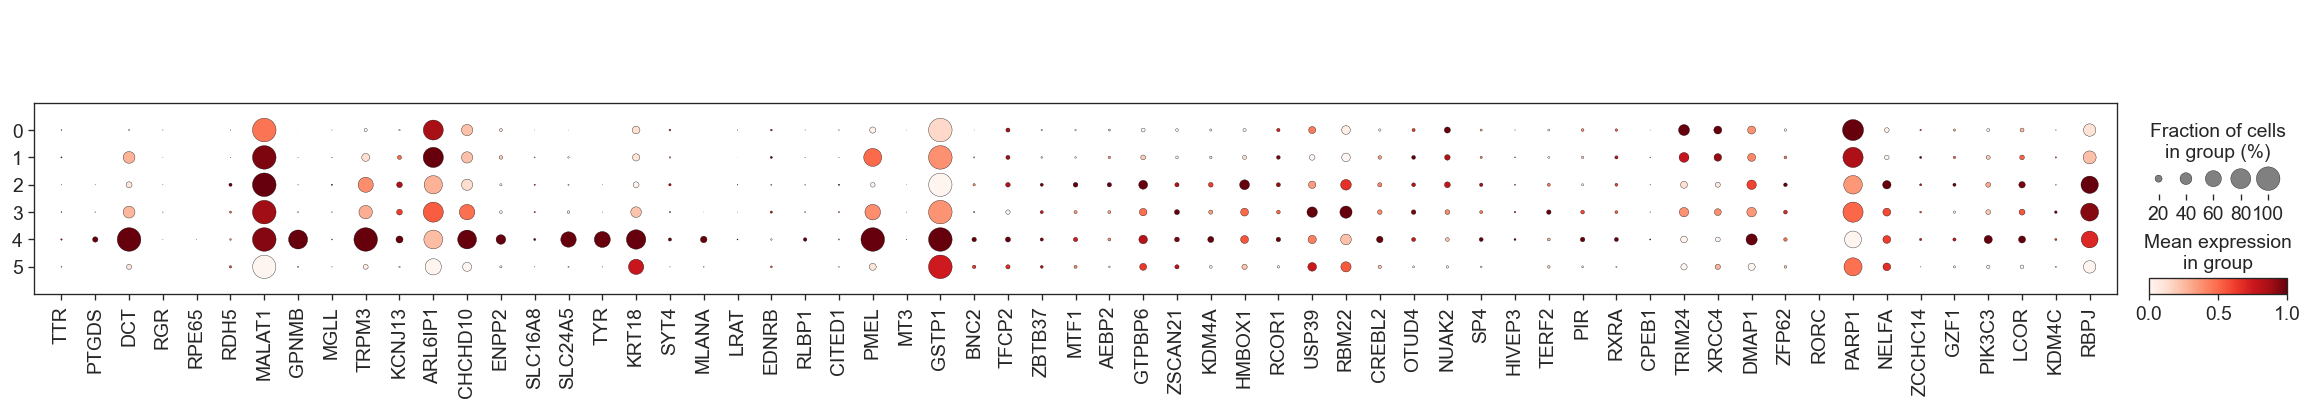

In [ ]:
sc.pl.dotplot(adata, RPE_all, groupby='leiden', use_raw=False, show=True, standard_scale='var')

/home/julia/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


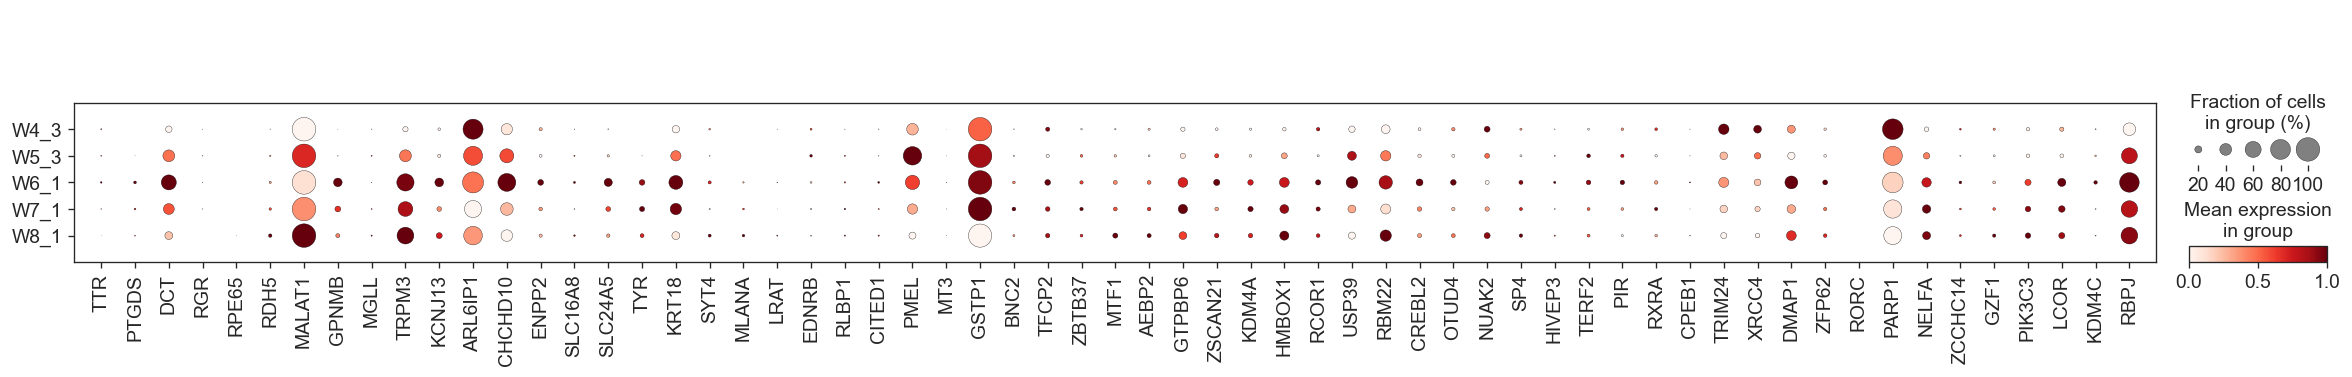

In [ ]:
sc.pl.dotplot(adata, RPE_all, groupby='stage', use_raw=False, show=True, standard_scale='var')